# Confidence Interval

## Terms of Confidence Interval

- <big>**Point Estimate**</big>
  - Using a single value to estimate the population parameter 
- <big>**Interval Estimate**</big>
  - Using a range of values to estimate the population parameter 
- <big>**Z-Score**</big>
  - Measures the distance of a data point from the population mean on a standard Normal Distribution
  - If is `1`, then the data point is above the mean by 1 standard deviation
  - If is `-1`, then the data point is below the mean by 1 standard deviation
  - ...
- <big>**t-Score**</big>, from t-distribution
  - there is more uncertainty involved in estimating the standard error for small sample sizes.
  - with a small sample size, and your data is approximately normally distributed
    - you should use the t-distribution rather than the standard normal distribution
  - t-distribution has bigger tails than the standard normal distribution does
  - bigger tails indicate the higher frequency of outliers that come with a small dataset.

### Definitions

- Interval as the expression of "Uncertainty" on estimated population parameter
  - Point Estimate does not include the Uncertainty
- Define Confidence Interval
  - **Sample Statsitc**
  - **Margin of Error**
    - Maximum expected difference between the population parameter and a sample estimate
    - I.e. the amount of esimate might vary from the true value
    - Formula: `Sample Standard Error`, multiplied by `Z-Score`
  - **Confidence Level**
    - Likelihood that a particular sampling method will produce a confidence interval that will include the population parameter
    - E.g. with 95% Confidence Level with a Confidence Interval between 28 and 32 pounds
      - If taking 100 random samples from the population
      - And get confidence interval for each sample
      - Approximately 95 of the 100 intervals would contain the population mean


### Interpretations

- 95% confidence means that
  - if you take repeated random samples from the population
  - and construct a confidence interval for each sample using the same method
  - 95% of those intervals will contain the population mean
- 95% success rate of producing an interval that contains te population mean
  - 5% failure rate, i.e. getting an interval that does not contain the population mean
- Mis-Interpretations
  - 95% of the data points will fall within the interval
  - 95% of all possible sample means fall within the range of the interval
  - Assume that a confidence interval refers to the only possible source of error in your results
    - ohter kinds of errors existed, e.g. poorly designed survey questions, sampling bias...etc
    - i.e. uncertainty lies in an estimation process based on random sampling

### Constructions

1. **Identify a sample statistic** (e.g. mean, median, proportion...etc)
2. **Choose a confident level (usually 95%)**
3. **Find the margin of error**
   - Range of values above and below the sample statistic
   - Margin of Error = Z-Score * Standard Error
     - **Z-Score**, the distance of a data point from the population mean in a standard normal distribution
       - e.g. if Z-score = 1, then it's 1 standard deviation above the mean
     - **Standard Error**, measures the variability of the sample statistic
       - For Proportion: Square root of ( `sample proportion` * (1 - `sample proportion`)  / `sample size`)
       - For Mean: population std / Square root of (`sample size`)
         - Known population Standard Deviation
       - For Mean: sample standard deviation, divided by Square root of (`sample size`)
4. **Calculate the Confidence Interval**
   - Test Statistics ± Margin of Error, i.e. Upper & Lower limit
   - For Proportion
     - Sample Proportion ± Margin of Error, e.g. 55% vote in favor ± 5.2% margin of error
   - For Mean
     - With Standard Deviation known, using Z-score
     - With unknown standard deviation (usual case), using t-score
- https://www.coursera.org/learn/the-power-of-statistics/lecture/VCasN/introduction-to-confidence-intervals
- https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size

In [8]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px

In [2]:
df = plotly.data.gapminder()
df.shape

(1704, 8)

In [3]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


> Per Continent differenc on GDP Per Capita

In [10]:
df.groupby("continent").gdpPercap.mean().to_frame()
# Americas and Asias have really close average

,gdpPercap
continent,
Africa,2193.754578
Americas,7136.110356
Asia,7902.150428
Europe,14469.475533
Oceania,18621.609223


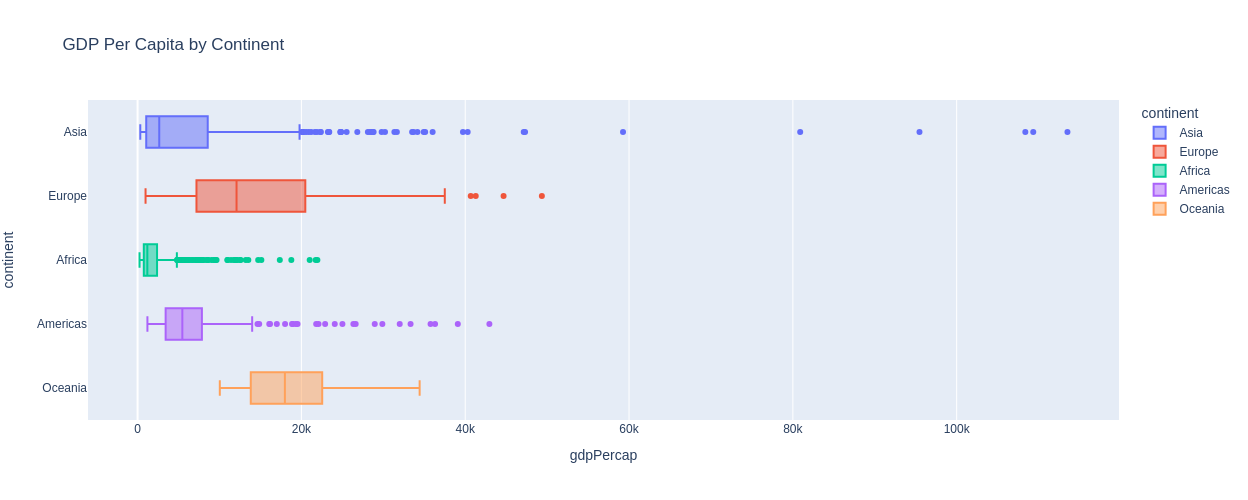

In [19]:
fig = px.box(
    df, x="gdpPercap", y="continent", color="continent", 
    height=500, title="GDP Per Capita by Continent"
)
fig.show()

> Confidence Interval of Americas Average GDP Per Capita

1. Identify a sample statistic, E.g. Sample Mean
2. Choose a confidence level, E.g. 95% 
3. Find the margin of error
   - Identify the `Z-Value` associated with the selected Confidence Level
   - Calculate Standard Error with "sample standard deviation" and "sample size"
   - Margin of Error as `Standard Error` times `Z-Value`
4. Calculate the interval
   - Test Statistisc + or - Margin of Error

In [23]:
from scipy import stats

In [20]:
sample = df.query("continent == 'Americas'")
sample.shape

(300, 8)

In [22]:
# Identify a sample statistic, E.g. Sample Mean
sample_mean = sample.gdpPercap.mean()
sample_mean

7136.110355589998

In [26]:
# Choose a confidence level, E.g. 95%
confidence_level = 0.95
confidence_level

0.95

In [43]:
# Identify the Z-Value associated with the selected Confidence Level
## Percent point function (inverse of cdf — percentiles)
## https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa
# z_value = 1.96
z_value = stats.norm.ppf(1-(1-confidence_level)/2)
z_value

1.959963984540054

In [44]:
# Calculate Standard Error with "sample standard deviation" and "sample size"
standard_error = sample.gdpPercap.std() / np.sqrt(sample.shape[0])
standard_error

369.3173481861239

In [45]:
# Margin of Error as Standard Error times Z-Value
margin_of_error = standard_error * z_value
margin_of_error

723.8487013106419

In [46]:
# Calculate the interval
sample_mean - margin_of_error, sample_mean + margin_of_error

(6412.261654279357, 7859.95905690064)

In [47]:
# using Scipy
stats.norm.interval(confidence=confidence_level, loc=sample_mean, scale=standard_error)

(6412.261654279357, 7859.95905690064)

- 95% Confidence Inteval with Americas average GDP is between 6,412 and 7,859
- given the observed sample GDPs, there is a 95% confidence that the population mean GDP for Americas was between 6,412 and 7,859